In [158]:
%%time

UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Change numerical features to %

In [160]:
## Load .csv

df= pd.read_csv('../raw_data/wra_CT_PM_conclusions.csv')

In [161]:
df_numerical= df.select_dtypes(exclude='object')

In [162]:
df_numerical.head()

,Unnamed: 0,Authorisation status,Orphan medicine,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,status_terminated,...,org_nih,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results
0,0,0,0,54,0,2,0,1,0,3,...,0,12,2,0,2,1,2,17,30,44
1,1,0,1,12,0,2,0,1,0,0,...,0,2,0,0,0,1,4,3,0,11
2,2,0,0,20,0,0,0,0,0,0,...,0,3,0,0,2,0,0,5,12,36
3,3,0,0,111,3,8,0,7,0,12,...,13,53,4,1,0,34,65,21,0,523
4,4,0,0,20,0,0,0,0,0,0,...,0,3,0,0,2,0,0,5,12,36


In [163]:
df_numerical.drop(labels= 'Unnamed: 0', inplace=True, axis=1)

c:\users\lucia\.venvs\lewagon\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [164]:
df_numerical.columns

Index(['Authorisation status', 'Orphan medicine', 'n_trials',
       'status_not_yet_recruiting', 'status_recruiting',
       'status_enrolling_by_invitation', 'status_active_not_recruiting',
       'status_suspended', 'status_terminated', 'status_completed',
       'status_withdrawn', 'status_unknown', 'org_fed', 'org_indiv',
       'org_industry', 'org_network', 'org_nih', 'org_other', 'org_other_gov',
       'phase_early_1', 'phase_not_applicable', 'phase_1', 'phase_2',
       'phase_3', 'phase_4', 'pm_results'],
      dtype='object')

In [165]:
percent_list= df_numerical.columns[3:]

In [166]:
percent_list

Index(['status_not_yet_recruiting', 'status_recruiting',
       'status_enrolling_by_invitation', 'status_active_not_recruiting',
       'status_suspended', 'status_terminated', 'status_completed',
       'status_withdrawn', 'status_unknown', 'org_fed', 'org_indiv',
       'org_industry', 'org_network', 'org_nih', 'org_other', 'org_other_gov',
       'phase_early_1', 'phase_not_applicable', 'phase_1', 'phase_2',
       'phase_3', 'phase_4', 'pm_results'],
      dtype='object')

In [167]:
for column in percent_list:
    df_numerical[column]=((df_numerical[column]*100)/df_numerical['n_trials']).replace([np.inf, -np.inf, np.nan], 0)

c:\users\lucia\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [168]:
def percentage_columns(df,column_list,column_total):
    for column in column_list:
        df[column]=((df[column]*100)/df[column_total]).replace([np.inf, -np.inf, np.nan], 0)
    return df

In [169]:
df_cleaned=df_numerical[df_numerical['n_trials']< 3000]

In [170]:
X= df_cleaned.drop(labels='Authorisation status', axis=1)
y=df_cleaned['Authorisation status']

In [171]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=10).fit_transform(X,y)

In [172]:
X_new.shape

(1359, 10)

In [173]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(X_new)
X_new= scaler.transform(X_new)

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_new,y, test_size= 0.2, random_state=1)

In [175]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8455882352941176

In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics


cv_results= cross_validate(knn, X_train, y_train, cv=5,
                          scoring=['accuracy','f1'])


In [177]:
#print('Train f1:', cv_results['train_f1_macro'].mean())
#print('Train accuracy:', {cv_results['train_accuracy'].mean()})


print(f'Test f1:',{cv_results['test_f1'].mean()})
print(f'Test accuracy:', {cv_results['test_accuracy'].mean()})

Test f1: {0.40358612935974564}
Test accuracy: {0.8638523654504713}


In [ ]:
df_numerical.head(1)

# Mierda

In [ ]:
sns.heatmap(df_numerical.corr())

In [ ]:
df.columns

In [ ]:
group = df.groupby(['Authorisation status','Generic']).size().unstack(level=1)
group.plot(kind = 'barh',stacked = True)

In [ ]:
group = df.groupby(['Authorisation status','Orphan medicine']).size().unstack(level=1)
group.plot(kind = 'barh',stacked = True)

In [ ]:
sns.catplot(data = df, x = 'Authorisation status',y = 'Orphan medicine', kind = 'box')

In [ ]:
for column in percent_list:
    sns.catplot(data = df_cleaned, x = 'Authorisation status',y = column, kind = 'box')

# Model 2

In [180]:
len(percent_list)
top_list= ['phase_4', 'Orphan medicine', 
           'org_indiv', 'n_trials', 
           'status_terminated', 'phase_2', 
           'phase_3', 'status_not_yet_recruiting', 
           'org_fed', 'org_nih','Authorisation status']
top_list_2= ['org_industry',  'n_trials',  'phase_4',
             'org_other', 'status_completed', 'status_recruiting',
             'phase_3',  'pm_results', 'status_not_yet_recruiting',
             'phase_2','Authorisation status']

In [181]:
df_secondmodel= df_cleaned[top_list_2]

In [326]:
X2= df_secondmodel.drop(labels='Authorisation status', axis=1)
y2=df_secondmodel['Authorisation status']

In [327]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test= train_test_split(X2,y2, test_size= 0.2, random_state=1)

In [328]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X2_train)
X2_train= scaler.transform(X2_train)
X2_test= scaler.transform(X2_test)

In [329]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(X2_train,y2_train)
y2_pred= knn.predict(X2_train)

In [330]:
from sklearn.metrics import classification_report
print(classification_report(y2_train, y2_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       939
           1       0.56      0.43      0.49       148

    accuracy                           0.88      1087
   macro avg       0.74      0.69      0.71      1087
weighted avg       0.87      0.88      0.87      1087



## Grid Search 

### With several models:

In [331]:
# Standard models
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score

model_list= [SVC(), RandomForestClassifier(),
              BernoulliNB(), ComplementNB(), 
              KNeighborsClassifier(), MLPClassifier(max_iter=1000),
              SGDClassifier()]
model_scoring_test= {}
model_scoring_train={}

for model in model_list:
    model.fit(X2_train,y2_train)
    y2_pred_test= model.predict(X2_test)
    y2_pred_train= model.predict(X2_train)
    
    model_scoring_test[str(model)]= f1_score(y2_test, y2_pred_test)
    model_scoring_train[str(model)]= f1_score(y2_train, y2_pred_train)

In [332]:
print('--------SCORE ON TRAIN---------------')
print(model_scoring_train)
print('--------SCORE ON TEST---------------')
print(model_scoring_test)


--------SCORE ON TRAIN---------------
{'SVC()': 0.08974358974358974, 'RandomForestClassifier()': 0.8787878787878788, 'BernoulliNB()': 0.46496815286624205, 'ComplementNB()': 0.3080082135523614, 'KNeighborsClassifier()': 0.48854961832061067, 'MLPClassifier(max_iter=1000)': 0.3804878048780488, 'SGDClassifier()': 0.013333333333333332}
--------SCORE ON TEST---------------
{'SVC()': 0.0, 'RandomForestClassifier()': 0.19999999999999996, 'BernoulliNB()': 0.3658536585365854, 'ComplementNB()': 0.2882882882882883, 'KNeighborsClassifier()': 0.28169014084507044, 'MLPClassifier(max_iter=1000)': 0.09090909090909091, 'SGDClassifier()': 0.0}


In [47]:
model_shortlist= [RandomForestClassifier(),KNeighborsClassifier(), MLPClassifier(), BernoulliNB(),ComplementNB()]

### Grid search Random Forest

In [333]:
param_grid = {'n_estimators': [50, 100, 200, 300, 400],
              'max_features': ['auto', 'sqrt'],
               'max_depth': [1 , 5 , 10, 12],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
                'class_weight': ['balanced'] }

In [310]:
clf= GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1',
                cv= 5, n_jobs=-1, verbose = 1)


In [311]:
clf = clf.fit(X2_train, y2_train)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  9.2min finished


In [292]:
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best params:")
print(clf.best_params_)
print("Best score found by grid search:")
print(clf.best_score_)

Best estimator found by grid search:
RandomForestClassifier(bootstrap=False, max_depth=12)
Best params:
{'bootstrap': False, 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score found by grid search:
0.3535139576141116


In [1]:
clf.best_estimator_

NameError: name 'clf' is not defined

In [293]:
rf_best= clf.best_estimator_

In [334]:
rf_best.fit(X2_train, y2_train)
y_rf_pred= rf_best.predict(X2_test)

f1_score(y2_test, y_rf_pred)

0.24000000000000002

In [354]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, y_rf_pred))


              precision    recall  f1-score   support

           0       0.87      0.98      0.92       233
           1       0.55      0.15      0.24        39

    accuracy                           0.86       272
   macro avg       0.71      0.57      0.58       272
weighted avg       0.83      0.86      0.83       272



<AxesSubplot:>

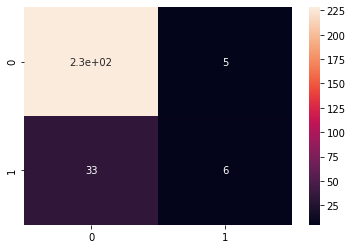

In [355]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y2_test, y_rf_pred),annot=True)

### GridSearch KNeighbors

In [346]:
param_grid2 = {'n_neighbors': [1,2,3,4, 5, 6, 7],
               'weights': ['uniform', 'distance'],
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size': [5,10,20],
               'p': [1, 2],
               'n_jobs': [-1]}

In [347]:
clf2= GridSearchCV(KNeighborsClassifier(), param_grid2, scoring='f1',
                cv= 5, n_jobs=-1, verbose=1)

In [348]:
clf2 = clf2.fit(X2_train, y2_train)


Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:   30.4s finished


In [349]:
clf2.best_estimator_

KNeighborsClassifier(leaf_size=10, n_jobs=-1, p=1, weights='distance')

In [350]:
print("Best params:")
print(clf2.best_params_)
print("Best score found by grid search:")
print(clf2.best_score_)
kn_best= clf2.best_estimator_


Best params:
{'algorithm': 'auto', 'leaf_size': 10, 'n_jobs': -1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best score found by grid search:
0.4565932517095307


In [351]:
kn_best.fit(X2_train, y2_train)
y_kn_pred= kn_best.predict(X2_test)

f1_score(y2_test, y_kn_pred)

0.42857142857142855

In [352]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, y_kn_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       233
           1       0.40      0.46      0.43        39

    accuracy                           0.82       272
   macro avg       0.65      0.67      0.66       272
weighted avg       0.83      0.82      0.83       272



<AxesSubplot:>

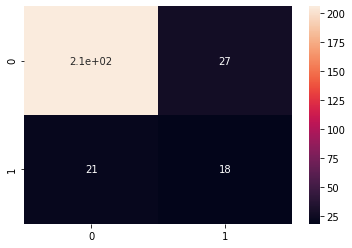

In [353]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y2_test, y_kn_pred),annot=True)

### GridSearch MLPClassifier


In [288]:
## Implement the third grid
param_grid3 = {'hidden_layer_sizes': [200,250],
               'activation': ['logistic', 'tanh', 'relu'],
               'solver': ['lbfgs', 'sgd', 'adam'],
               'alpha': [0.0001, 0.00001],
               'learning_rate_init':[0.01 , 0.05],
               'learning_rate': ['invscaling', 'adaptive'],
               'n_iter_no_change': [10],
               'max_iter': [3000],
               'early_stopping': [True]}

In [289]:
clf3= GridSearchCV(MLPClassifier(), param_grid3, scoring='f1',
                cv= 5, n_jobs=-1, verbose=1)

In [290]:
clf3 = clf3.fit(X2_train, y2_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 29.5min finished
c:\users\lucia\.venvs\lewagon\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [291]:
print("Best params:")
print(clf3.best_params_)
print("Best score found by grid search:")
print(clf3.best_score_)
mlp_best= clf3.best_estimator_

Best params:
{'activation': 'tanh', 'alpha': 1e-05, 'early_stopping': True, 'hidden_layer_sizes': 250, 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'max_iter': 3000, 'n_iter_no_change': 10, 'solver': 'lbfgs'}
Best score found by grid search:
0.37621625204365694


In [356]:
mlp_best.fit(X2_train, y2_train)
y_mlp_pred= mlp_best.predict(X2_test)

f1_score(y2_test, y_mlp_pred)

c:\users\lucia\.venvs\lewagon\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.276923076923077

In [357]:
print(classification_report(y2_test, y_mlp_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       233
           1       0.35      0.23      0.28        39

    accuracy                           0.83       272
   macro avg       0.61      0.58      0.59       272
weighted avg       0.80      0.83      0.81       272



<AxesSubplot:>

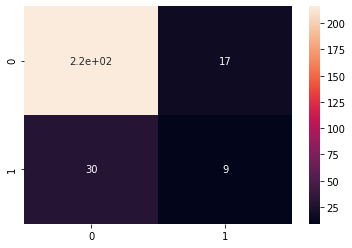

In [358]:
sns.heatmap(confusion_matrix(y2_test, y_mlp_pred),annot=True)

### Grid Search BernoulliNB

In [245]:
param_grid4 = {'alpha': [0.1, 0.01 , 0.5, 0.7, 1]}

In [285]:
clf4= GridSearchCV(BernoulliNB(), param_grid4, scoring= 'f1',
                cv= 5, n_jobs=-1, verbose=1)

In [286]:
clf4 = clf4.fit(X2_train, y2_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [248]:
print("Best params:")
print(clf4.best_params_)
print("Best score found by grid search:")
print(clf4.best_score_)
ber_best= clf4.best_estimator_

Best params:
{'alpha': 0.1}
Best score found by grid search:
0.46526256805799876


In [359]:
ber_best.fit(X2_train, y2_train)
y_ber_pred= ber_best.predict(X2_test)

f1_score(y2_test, y_ber_pred)

0.3658536585365854

In [360]:
print(classification_report(y2_test, y_ber_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       233
           1       0.35      0.38      0.37        39

    accuracy                           0.81       272
   macro avg       0.62      0.63      0.63       272
weighted avg       0.82      0.81      0.81       272



<AxesSubplot:>

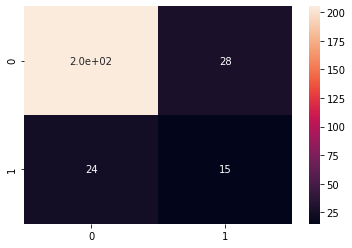

In [361]:
sns.heatmap(confusion_matrix(y2_test, y_ber_pred),annot=True)

### Grid Search ComplementNB


In [129]:
from sklearn.naive_bayes import ComplementNB

In [143]:
param_grid5 = {'alpha': [1, 1.2,1.5,1.7,2]}

In [268]:
clf5= GridSearchCV(ComplementNB(), param_grid5, scoring='f1',
                cv= 5, n_jobs=-1, verbose=1)

In [269]:
clf5 = clf5.fit(X2_train, y2_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


In [270]:
clf5.best_estimator_

ComplementNB(alpha=1.2)

In [271]:
print("Best params:")
print(clf5.best_params_)
print("Best score found by grid search:")
print(clf5.best_score_)
comp_best= clf5.best_estimator_

Best params:
{'alpha': 1.2}
Best score found by grid search:
0.2998219553569215


In [362]:
comp_best.fit(X2_train, y2_train)
y_comp_pred= comp_best.predict(X2_test)

f1_score(y2_test, y_comp_pred)

0.2882882882882883

In [363]:
print(classification_report(y2_test, y_comp_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       233
           1       0.22      0.41      0.29        39

    accuracy                           0.71       272
   macro avg       0.55      0.58      0.55       272
weighted avg       0.79      0.71      0.74       272



<AxesSubplot:>

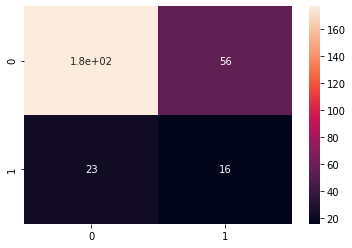

In [364]:
sns.heatmap(confusion_matrix(y2_test, y_comp_pred),annot=True)

### SUMMARY 

In [287]:
model_summary={}

In [299]:
for i in range (2,3):
    f'cl{i}.best_estimator_'

In [304]:
for model in model_shortlist:
    model_summary[str(model)]=0

In [335]:
model_summary['RandomForestClassifier()']= 0.24000000000000002

In [337]:
model_summary['KNeighborsClassifier()']= 0.42857142857142855  

In [344]:
model_summary['MLPClassifier()']= 0.34375

In [340]:
model_summary['BernoulliNB()']= 0.3658536585365854

In [342]:
model_summary['ComplementNB()']= 0.2882882882882883


In [345]:
model_summary

{'RandomForestClassifier()': 0.24000000000000002,
 'KNeighborsClassifier()': 0.42857142857142855,
 'MLPClassifier()': 0.34375,
 'BernoulliNB()': 0.3658536585365854,
 'ComplementNB()': 0.2882882882882883}

## Pipelines

In [373]:
def percentage_columns(df,column_list,column_total):
    for column in column_list:
        df[column]=((df[column]*100)/df[column_total]).replace([np.inf, -np.inf, np.nan], 0)
    return df

In [376]:
df_dumb= percentage_columns(df_numerical, percent_columns, 'n_trials')


c:\users\lucia\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [384]:
test_tranform= FunctionTransformer(lambda x: x)

test_pipe= Pipeline([
    ('percentage_transformation', percent),
    ('scaler', MinMaxScaler())])
test_pipe.fit(X,y)
test_pipe.transform(X)


,Orphan medicine,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,status_terminated,status_completed,status_withdrawn,...,org_nih,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results
0,0,54,0.000000,6.858711,0.000000,3.429355,0.000000,10.288066,147.462277,10.288066,...,0.000000,41.152263,6.858711,0.000000,6.858711,3.429355,6.858711,58.299040,102.880658,150.891632
1,1,12,0.000000,138.888889,0.000000,69.444444,0.000000,0.000000,625.000000,0.000000,...,0.000000,138.888889,0.000000,0.000000,0.000000,69.444444,277.777778,208.333333,0.000000,763.888889
2,0,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,50.000000,...,0.000000,75.000000,0.000000,0.000000,50.000000,0.000000,0.000000,125.000000,300.000000,900.000000
3,0,111,2.434867,6.492979,0.000000,5.681357,0.000000,9.739469,51.943836,2.434867,...,10.551092,43.015989,3.246490,0.811622,0.000000,27.595163,52.755458,17.044071,0.000000,424.478533
4,0,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,50.000000,...,0.000000,75.000000,0.000000,0.000000,50.000000,0.000000,0.000000,125.000000,300.000000,900.000000
5,0,36,46.296296,84.876543,0.000000,15.432099,0.000000,0.000000,108.024691,7.716049,...,0.000000,108.024691,0.000000,7.716049,38.580247,15.432099,84.876543,92.592593,30.864198,408.950617
6,0,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,909.090909,0.000000,...,826.446281,82.644628,0.000000,0.000000,0.000000,909.090909,0.000000,0.000000,0.000000,826.446281
7,0,132,0.573921,5.739210,0.000000,5.739210,0.000000,2.295684,51.652893,2.869605,...,0.573921,39.600551,1.147842,0.000000,7.460973,6.313131,19.513315,15.495868,19.513315,808.080808
8,0,61,2.687450,2.687450,0.000000,5.374899,0.000000,13.437248,118.247783,5.374899,...,2.687450,48.374093,2.687450,0.000000,21.499597,2.687450,29.561946,56.436442,45.686643,2112.335394
9,0,618,0.288015,1.885192,0.052366,0.837863,0.026183,1.073512,10.001990,0.366565,...,0.130916,6.283973,0.130916,0.026183,0.942596,0.497481,1.806642,4.634430,3.220536,154.192981


In [378]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

percent_columns= ['status_not_yet_recruiting', 'status_recruiting',
       'status_enrolling_by_invitation', 'status_active_not_recruiting',
       'status_suspended', 'status_terminated', 'status_completed',
       'status_withdrawn', 'status_unknown', 'org_fed', 'org_indiv',
       'org_industry', 'org_network', 'org_nih', 'org_other', 'org_other_gov',
       'phase_early_1', 'phase_not_applicable', 'phase_1', 'phase_2',
       'phase_3', 'phase_4', 'pm_results']
top_columns= ['org_industry',  'n_trials',  'phase_4',
             'org_other', 'status_completed', 'status_recruiting',
             'phase_3',  'pm_results', 'status_not_yet_recruiting',
             'phase_2','Authorisation status']

percent=FunctionTransformer(lambda df_numerical: percentage_columns(df_numerical, percent_columns, 'n_trials'))

preprocessing= ColumnTransformer([
    ('percentage_transformation', percent, percent_columns),
    ('scaler', MinMaxScaler(), percent_columns)])

numerical_pipe= Pipeline([
    ('preprocessing', preprocessing),
    ('best_model', KNeighborsClassifier(leaf_size=10, n_jobs=-1, p=1, weights='distance'))])

numerical_pipe.fit(X, y)

KeyError: 'n_trials'

In [ ]:
numerical_pipe.fit()